In [1]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as pp
from datetime import datetime, date

In [2]:
# Get SPY data for past several years
SPY_Dat = web.DataReader('SPY', 'yahoo')

In [3]:
# We are going to use a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day in the series.
# Use min_periods=1 if you want to let the first 252 days data have an expanding window
Roll_Max = SPY_Dat['Adj Close'].rolling(window, min_periods=1).max()
Roll_Max.rename("Roll_Max", inplace=True)
Daily_Drawdown = SPY_Dat['Adj Close']/Roll_Max - 1.0
Daily_Drawdown.rename("Daily_Drawdown", inplace=True)

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()
Max_Daily_Drawdown.rename("Max_Daily_Drawdown", inplace=True)

result = pd.concat([SPY_Dat['Adj Close'],Roll_Max, Daily_Drawdown, Max_Daily_Drawdown], axis=1)

In [4]:
result.head()

,Adj Close,Roll_Max,Daily_Drawdown,Max_Daily_Drawdown
Date,,,,
2009-12-31,92.968788,92.968788,0.0,0.0
2010-01-04,94.545494,94.545494,0.0,0.0
2010-01-05,94.795784,94.795784,0.0,0.0
2010-01-06,94.862526,94.862526,0.0,0.0
2010-01-07,95.262955,95.262955,0.0,0.0


In [5]:
result.tail()

,Adj Close,Roll_Max,Daily_Drawdown,Max_Daily_Drawdown
Date,,,,
2018-12-28,247.750000,290.560242,-0.147337,-0.193489
2018-12-31,249.919998,290.560242,-0.139869,-0.193489
2019-01-02,250.179993,290.560242,-0.138974,-0.193489
2019-01-03,244.210007,290.560242,-0.159520,-0.193489
2019-01-04,251.119995,290.560242,-0.135739,-0.193489


In [6]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2268 entries, 2009-12-31 to 2019-01-04
Data columns (total 4 columns):
Adj Close             2268 non-null float64
Roll_Max              2268 non-null float64
Daily_Drawdown        2268 non-null float64
Max_Daily_Drawdown    2268 non-null float64
dtypes: float64(4)
memory usage: 88.6 KB


In [7]:
result.describe()

,Adj Close,Roll_Max,Daily_Drawdown,Max_Daily_Drawdown
count,2268.000000,2268.000000,2268.000000,2268.000000
mean,172.141959,176.871708,-0.028225,-0.107706
std,56.653246,57.723079,0.035268,0.046342
min,86.018715,92.968788,-0.193489,-0.193489
25%,117.531284,123.673800,-0.040777,-0.138594
50%,176.126915,181.156830,-0.013753,-0.101019
75%,206.923588,208.616135,-0.002398,-0.072734
max,290.560242,290.560242,0.000000,0.000000


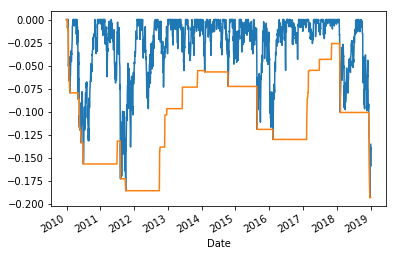

In [8]:
# Plot the results
Daily_Drawdown.plot()
Max_Daily_Drawdown.plot()
pp.show()

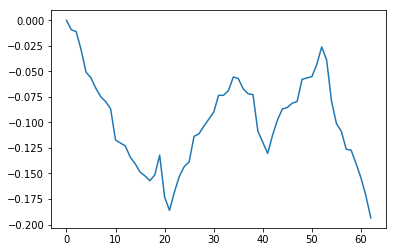

In [23]:
aa = Max_Daily_Drawdown.unique()
pp.plot(aa)

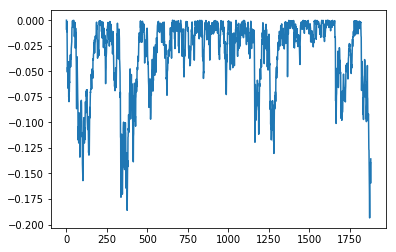

In [24]:
bb = Daily_Drawdown.unique()
pp.plot(bb)